In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
## data manupalitation and handling 
import pandas as pd
import numpy as np

# Data visualizatio libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Multicollinearity test and treatment Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

## data preprocessing and EDA libraries 
from collections import OrderedDict 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Model Selection Libraries
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
 
#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation Libraries
from sklearn.metrics import r2_score, mean_squared_error


# Warning filter library
import warnings
warnings.filterwarnings('ignore')

## loding the data frame

In [3]:
df=pd.read_csv("Supplychain train dataset.csv")

In [4]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


#### The Objective of this exercise is to build a model , using historical data that will  determine an optimim weight of the product to be  shipped each time from the respective warehouse.

### exploratory data analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

observation from df.info
1. Some of  features  have  null values 
2. 22150 rows & 24 coloums 
3. feature have  int, float,object type data set 
4. Target  variable is product_wg_ton and rest are independent variable.

In [6]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


##### Analysis from descriptive statistics

1. There might be skewness in the data in the columns.
2. There might be chance of outliers if we compare Quartiles of some of the columns.(transport_issue,Competitor_in_mkt,  retail_shop_num,workers_num)
3. Since minimum and Q1 values are same for transport_issue, flood_impacted,electric_supply and temp_reg_mach we do not have outliers in the Lower Whisker region for them.
4. The range of values in flood_proof is 0 and 1  we can not be  consider this feature for outlier treatment.


## Bulding a custom summary function for EDA report

In [7]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'Feature Name': col , 
                'Count': my_df[col].count() ,
                'Minimum': my_df[col].min() ,
                'Quartile1': my_df[col].quantile(.25) ,
                'Quartile2': my_df[col].quantile(.50) ,
                'Mean': my_df[col].mean() ,
                'Quartile 3': my_df[col].quantile(.75) ,
                'Maximum': my_df[col].max() ,
                'Variance': round(my_df[col].var()) ,
                'Standard Deviation': my_df[col].std() ,
                'Skewness': my_df[col].skew() , 
                'Kurtosis': my_df[col].kurt()
                })
            result.append(stats)
    result_df = pd.DataFrame(result)
    # skewness type
    skewness_label = []
    for i in result_df["Skewness"]:
        if i <= -1:
            skewness_label.append('Highly Negatively Skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0:
            skewness_label.append('Fairly Negatively Skewed')
        elif 0 <= i < 0.5:
            skewness_label.append('Fairly Positively Skewed')
        elif 0.5 <= i < 1:
            skewness_label.append('Moderately Positively Skewed')
        elif i >= 1:
            skewness_label.append('Highly Positively Skewed')
    result_df['Skewness Comment'] = skewness_label
    
    kurtosis_label=[]
    for i in result_df['Kurtosis']:
        if i >= 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif i <= -1:
            kurtosis_label.append('Platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['Kurtosis Comment'] = kurtosis_label
    Outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                Outliers_label.append('Have Outliers')
            else:
                Outliers_label.append('No Outliers')
    result_df['Outlier Comment'] = Outliers_label

            
    return result_df


    

    

In [8]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Mean,Quartile 3,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,num_refill_req_l3m,22150,0.0,2.00,4.0,4.097020,6.0,8.0,7,2.606289,-0.081390,-1.218193,Fairly Negatively Skewed,Platykurtic Curve,No Outliers
1,transport_issue_l1y,22150,0.0,0.00,0.0,0.777201,1.0,5.0,1,1.201747,1.605424,1.820683,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
2,Competitor_in_mkt,22150,0.0,2.00,3.0,3.103928,4.0,12.0,1,1.142886,0.985102,1.798511,Moderately Positively Skewed,Leptokurtic Curve,Have Outliers
3,retail_shop_num,22150,1821.0,4309.25,4859.0,4983.115711,5499.0,11008.0,1103832,1050.634225,0.905324,1.846915,Moderately Positively Skewed,Leptokurtic Curve,Have Outliers
4,distributor_num,22150,15.0,29.00,42.0,42.386998,56.0,70.0,258,16.057730,0.017210,-1.187118,Fairly Positively Skewed,Platykurtic Curve,No Outliers
5,flood_impacted,22150,0.0,0.00,0.0,0.098691,0.0,1.0,0,0.298253,2.691308,5.243614,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
6,flood_proof,22150,0.0,0.00,0.0,0.054492,0.0,1.0,0,0.226991,3.925685,13.412215,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
7,electric_supply,22150,0.0,0.00,1.0,0.656072,1.0,1.0,0,0.475028,-0.657167,-1.568273,Moderately Negatively Skewed,Platykurtic Curve,No Outliers
8,dist_from_hub,22150,55.0,109.00,164.0,163.613725,218.0,271.0,3926,62.660709,-0.009042,-1.200679,Fairly Negatively Skewed,Platykurtic Curve,No Outliers
9,workers_num,21273,10.0,24.00,28.0,28.936398,33.0,98.0,62,7.843431,1.042478,3.285720,Highly Positively Skewed,Leptokurtic Curve,Have Outliers


 ##### Analysis from customs summary. 
 
 1. Feature having Mesokurtic curve implies the data points are moderate in distance from the mean so mean and SD are   moderate .
 2. Feature having Leptokurtic curve  implies data points are closer to the mean.
 3. Features with Platykurtic curve  implies the mean doesnt represent the whole data properly so SD is high.
 
 Overall Analysis from from customs summary Conclude that we can use the data for concluding results without Performing  Outlier treatment . 

### Data Pre-procesing and Cleaning For Model Building 

In [9]:
## Droping Ware_house_id and Wh_manager_id as it's indivisual values.
df.drop(['Ware_house_ID',"WH_Manager_ID"],axis=1,inplace=True) 

In [10]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [11]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

##### Observation 

1. It's  observed  that workers_num , Wh_est_year  & approved_with_govt_certificate have missing values .

2. for this data if we  will replace null values for workers_num with median Value of data set & for 
approved_wh_govt_certificate replace null values with mode.

3. For wh_est_year Since missing value is more then aproximately 50% we will perform linear regression model to predict the 
missing vlue and will replace the null values with predicted values.



In [12]:
## Replacing null values for approved_wh_gov_certificate with mode value of feature.
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

In [13]:
## Replacing null values for worker_num with median value of feature.
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].median())

In [14]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

#### Model for predicting and replacing the same to null value for Wh_est_year
1. Since missing value is almost more then 50% we will be predicting the null value with LinearRegression model.

In [15]:
correlation=df.corr('pearson')
correlation["wh_est_year"].sort_values(ascending=False)


wh_est_year                   1.000000
num_refill_req_l3m            0.012628
dist_from_hub                 0.009228
govt_check_l3m                0.008364
retail_shop_num               0.007627
workers_num                   0.006427
flood_impacted                0.002122
flood_proof                  -0.001866
electric_supply              -0.006766
Competitor_in_mkt            -0.012101
transport_issue_l1y          -0.013837
distributor_num              -0.015375
temp_reg_mach                -0.046395
wh_breakdown_l3m             -0.398383
product_wg_ton               -0.828743
storage_issue_reported_l3m   -0.858409
Name: wh_est_year, dtype: float64

In [16]:
col=["storage_issue_reported_l3m","wh_breakdown_l3m","temp_reg_mach","wh_est_year"]


In [17]:
x = df[col]
x["idxs"] = np.where(x["wh_est_year"].isnull(), 1, 0)
x_train = x[x["idxs"]==0]
x_test = x[x["idxs"]==1]

x_test.drop("wh_est_year", axis=1,inplace=True)

In [18]:
mo = LinearRegression()
mo.fit(x_train.drop("wh_est_year", axis=1), x_train["wh_est_year"])
y_pred = mo.predict(x_test)

In [19]:
y_pred

array([2012.38379094, 2019.0533264 , 2009.38366052, ..., 2007.37583663,
       2013.02985473, 2013.3993083 ])

In [20]:
x_test["wh_est_year"] = np.ceil(y_pred)

In [21]:
x_final = pd.concat([x_train, x_test], axis=0)

In [22]:
df["wh_est_year"] = x_final["wh_est_year"]

In [23]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [24]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2013.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2020.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2010.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2011.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


## ODT( outlier Detection  technique) 

###### Using IQR Methode 

In [25]:
import numpy as np

# Select the continuous variables
continuous_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
                      'retail_shop_num', 'distributor_num', 'flood_impacted',
                      'flood_proof', 'electric_supply', 'dist_from_hub',
                      'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
                      'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton'
                      ]

# Apply IQR method to treat outliers
df_outliers_treated = df.copy()  # Create a copy of the original dataset

for column in continuous_columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df_outliers_treated[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                             df[column].median(), df[column])

# The outliers have been treated in the `data_outliers_treated` DataFrame

# Assuming `data` is your original DataFrame and `data_outliers_treated` is the DataFrame with treated outliers

for column in continuous_columns:
    df[column] = df_outliers_treated[column]

### Encoding 

Transforming  the categorical values of the relevant features into numerical ones.

In [26]:
def transform_Variable1(x):
    if x == 'Small':
        return 0
    else:
        return 1

def transform_Variable2(x):
    if x == 'Zone 1':
        return 0
    elif x == 'Zone 2' or x == 'Zone 3':
        return 1
    elif x == 'Zone 4':
        return 2
    elif x == 'Zone 5':
        return 3
    else:
        return 4

def transform_Variable3(x):
    if x == 'A':
        return 0
    elif x == 'A+':
        return 1
    elif x == 'B' or x == 'B+':
        return 2
    else:
        return 3

df.WH_capacity_size = df.WH_capacity_size.apply(transform_Variable1)
df.WH_regional_zone = df.WH_regional_zone.apply(transform_Variable2)
df.approved_wh_govt_certificate = df.approved_wh_govt_certificate.apply(transform_Variable3)

In [27]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,0,West,4,3.0,1.0,2.0,4651.0,Rented,24.0,...,1.0,91.0,29.0,2013.0,13.0,0.0,0,5.0,15.0,17115.0
1,Rural,1,North,3,0.0,0.0,4.0,6217.0,Company Owned,47.0,...,1.0,210.0,31.0,2020.0,4.0,0.0,0,3.0,17.0,5074.0
2,Rural,1,South,1,1.0,0.0,4.0,4306.0,Company Owned,64.0,...,0.0,161.0,37.0,2010.0,17.0,0.0,0,6.0,22.0,23137.0
3,Rural,1,North,1,7.0,0.0,2.0,6000.0,Rented,50.0,...,0.0,103.0,21.0,2011.0,17.0,1.0,1,3.0,27.0,22115.0
4,Rural,1,North,3,3.0,1.0,2.0,4740.0,Company Owned,42.0,...,1.0,112.0,25.0,2009.0,18.0,0.0,3,6.0,24.0,24071.0


###### Using LabelEncoder to convert  categorical values of the relevant features into numerical ones

In [28]:
label_encoder = LabelEncoder()
df["Location_type"] = label_encoder.fit_transform(df["Location_type"])

In [29]:
label_encoder = LabelEncoder()
df["WH_regional_zone"] = label_encoder.fit_transform(df["WH_regional_zone"])

In [30]:
label_encoder = LabelEncoder()
df["zone"] = label_encoder.fit_transform(df["zone"])

In [31]:
label_encoder = LabelEncoder()
df["wh_owner_type"] = label_encoder.fit_transform(df["wh_owner_type"])

In [32]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,0,3,4,3.0,1.0,2.0,4651.0,1,24.0,...,1.0,91.0,29.0,2013.0,13.0,0.0,0,5.0,15.0,17115.0
1,0,1,1,3,0.0,0.0,4.0,6217.0,0,47.0,...,1.0,210.0,31.0,2020.0,4.0,0.0,0,3.0,17.0,5074.0
2,0,1,2,1,1.0,0.0,4.0,4306.0,0,64.0,...,0.0,161.0,37.0,2010.0,17.0,0.0,0,6.0,22.0,23137.0
3,0,1,1,1,7.0,0.0,2.0,6000.0,1,50.0,...,0.0,103.0,21.0,2011.0,17.0,1.0,1,3.0,27.0,22115.0
4,0,1,1,3,3.0,1.0,2.0,4740.0,0,42.0,...,1.0,112.0,25.0,2009.0,18.0,0.0,3,6.0,24.0,24071.0


### Feature Engineering (importing new feature such as Age,Issue_Reported,and Infrastructure of Wh)

In [33]:
df['No_of_year_old_Wh'] = pd.Timestamp.now().year - df['wh_est_year']
df['Issue_Reported'] = (df['transport_issue_l1y'].astype(bool) |
                   df['storage_issue_reported_l3m'].astype(bool) |
                   df['wh_breakdown_l3m'].astype(bool))
df['Infrastructure'] = (df['flood_proof'].astype(bool) |
                   df['electric_supply'].astype(bool) |
                   df['temp_reg_mach'].astype(bool))



In [34]:
df.head(10)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,No_of_year_old_Wh,Issue_Reported,Infrastructure
0,1,0,3,4,3.0,1.0,2.0,4651.0,1,24.0,...,2013.0,13.0,0.0,0,5.0,15.0,17115.0,10.0,True,True
1,0,1,1,3,0.0,0.0,4.0,6217.0,0,47.0,...,2020.0,4.0,0.0,0,3.0,17.0,5074.0,3.0,True,True
2,0,1,2,1,1.0,0.0,4.0,4306.0,0,64.0,...,2010.0,17.0,0.0,0,6.0,22.0,23137.0,13.0,True,False
3,0,1,1,1,7.0,0.0,2.0,6000.0,1,50.0,...,2011.0,17.0,1.0,1,3.0,27.0,22115.0,12.0,True,True
4,0,1,1,3,3.0,1.0,2.0,4740.0,0,42.0,...,2009.0,18.0,0.0,3,6.0,24.0,24071.0,14.0,True,True
5,0,0,3,0,8.0,0.0,2.0,5053.0,1,37.0,...,2009.0,23.0,1.0,1,3.0,3.0,32134.0,14.0,True,True
6,0,1,3,4,8.0,0.0,4.0,4449.0,0,38.0,...,2010.0,24.0,0.0,2,3.0,6.0,30142.0,13.0,True,True
7,0,1,1,3,1.0,0.0,4.0,7183.0,1,45.0,...,2009.0,18.0,0.0,3,6.0,24.0,24093.0,14.0,True,False
8,0,0,2,4,8.0,1.0,4.0,5381.0,1,42.0,...,2013.0,13.0,1.0,1,5.0,2.0,18082.0,10.0,True,True
9,0,0,2,4,4.0,0.0,3.0,3869.0,0,35.0,...,2017.0,6.0,0.0,3,6.0,2.0,7130.0,6.0,True,False


##### Plots of feature Engineering 

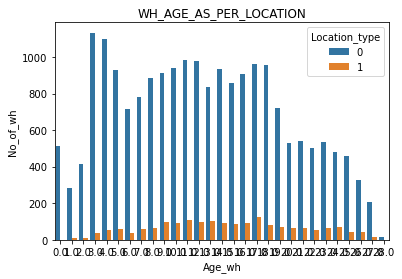

In [35]:
sns.countplot(data=df, x='No_of_year_old_Wh',hue='Location_type')
plt.xlabel('Age_wh')
plt.ylabel('No_of_wh')
plt.title('WH_AGE_AS_PER_LOCATION')
plt.show()

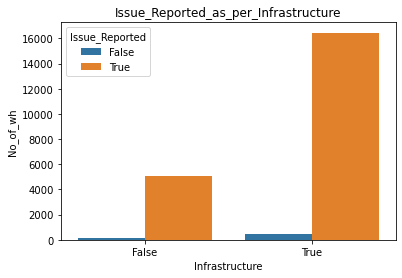

In [36]:
sns.countplot(data=df, x='Infrastructure',hue='Issue_Reported')
plt.xlabel('Infrastructure')
plt.ylabel('No_of_wh')
plt.title('Issue_Reported_as_per_Infrastructure')
plt.show()

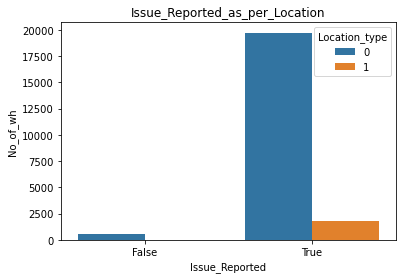

In [37]:
sns.countplot(data=df, x='Issue_Reported',hue='Location_type')
plt.xlabel('Issue_Reported')
plt.ylabel('No_of_wh')
plt.title('Issue_Reported_as_per_Location')
plt.show()


###### Using LabelEncoder to convert  categorical values of the relevant features into numerical ones

In [38]:
from sklearn.preprocessing import LabelEncoder

# Select the variables to be label encoded
variables = ['Issue_Reported', 'Infrastructure']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the variables in the data_encoded DataFrame
for variable in variables:
    df[variable] = label_encoder.fit_transform(df[variable])

#### ODT( outlier Detection  technique) 

###### Using IQR Methode For added feature engineering Features. 

In [39]:
import numpy as np

# Specify the columns with the newly created features
columns_with_outliers = ['No_of_year_old_Wh', 'Issue_Reported',
                         'Infrastructure']

# Loop through the columns and perform outlier treatment
for column in columns_with_outliers:
    # Calculate the IQR
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Print the number of outliers
    print(f"Number of outliers in {column}: {outliers.sum()}")

    # Replace outliers with the median value
    df.loc[outliers, column] = df[column].median()


Number of outliers in No_of_year_old_Wh: 0
Number of outliers in Issue_Reported: 600
Number of outliers in Infrastructure: 5270


In [40]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,No_of_year_old_Wh,Issue_Reported,Infrastructure
0,1,0,3,4,3.0,1.0,2.0,4651.0,1,24.0,...,2013.0,13.0,0.0,0,5.0,15.0,17115.0,10.0,1,1
1,0,1,1,3,0.0,0.0,4.0,6217.0,0,47.0,...,2020.0,4.0,0.0,0,3.0,17.0,5074.0,3.0,1,1
2,0,1,2,1,1.0,0.0,4.0,4306.0,0,64.0,...,2010.0,17.0,0.0,0,6.0,22.0,23137.0,13.0,1,1
3,0,1,1,1,7.0,0.0,2.0,6000.0,1,50.0,...,2011.0,17.0,1.0,1,3.0,27.0,22115.0,12.0,1,1
4,0,1,1,3,3.0,1.0,2.0,4740.0,0,42.0,...,2009.0,18.0,0.0,3,6.0,24.0,24071.0,14.0,1,1


#### Spliting Data into Train and Test Data set  for Model Building and Evaluation  

In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['product_wg_ton'])
y = df['product_wg_ton']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (15505, 24) (15505,)
Test set shape: (6645, 24) (6645,)


##### Correlation of target feature with independent feature .

In [42]:
def correlation_with_target(df, t_col):
    independent_variable = df.drop(t_col , axis = 1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variable , corr_result], index = ['Independent vairbales' , 'Correlation']).T
    return result.sort_values('Correlation' , ascending = False)
    

In [43]:
correlation_with_target(df, 'product_wg_ton')

,Independent vairbales,Correlation
16,storage_issue_reported_l3m,0.986796
21,No_of_year_old_Wh,0.893534
19,wh_breakdown_l3m,0.343677
17,temp_reg_mach,0.098452
0,Location_type,0.074158
1,WH_capacity_size,0.007637
6,Competitor_in_mkt,0.006158
9,distributor_num,0.005143
8,wh_owner_type,0.003412
3,WH_regional_zone,0.000792


##### From  above Observation it is concluded that storage_issue_reported has highest  & num_refill_req has lowest  
##### correlation with target feature.

### Model Building 

In [44]:
def model_builder(model_name, model, df, t_col):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name, rmse, r2]
    return result

In [45]:
def multiple_models(df, t_col):
    col_names = ['Model Name' , 'RMSE' , 'R2 Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('LinearRegression' , LinearRegression() , df , t_col)
    result.loc[len(result)] = model_builder('Lasso' , Lasso() , df , t_col)
    result.loc[len(result)] = model_builder('Ridge' , Ridge() , df , t_col)
    result.loc[len(result)] = model_builder('DTR' , DecisionTreeRegressor() , df , t_col)
    result.loc[len(result)] = model_builder('SVR' , SVR() , df , t_col)
    result.loc[len(result)] = model_builder('Random Forest' , RandomForestRegressor() , df , t_col)
    result.loc[len(result)] = model_builder('KNN' , KNeighborsRegressor() , df , t_col)
    result.loc[len(result)] = model_builder('Gboost' , GradientBoostingRegressor() , df , t_col)
    result.loc[len(result)] = model_builder('XGboost' , XGBRegressor() , df , t_col)
    result.loc[len(result)] = model_builder('Adaboost' , AdaBoostRegressor() , df , t_col)

    return result.sort_values('R2 Score' , ascending = False)
    

In [46]:
multiple_models(df , 'product_wg_ton')

,Model Name,RMSE,R2 Score
7,Gboost,937.694889,0.993475
8,XGboost,950.208694,0.993300
5,Random Forest,971.361351,0.992998
3,DTR,1339.018110,0.986695
9,Adaboost,1780.605918,0.976473
1,Lasso,1783.826561,0.976388
2,Ridge,1783.913133,0.976385
0,LinearRegression,1783.913717,0.976385
6,KNN,6124.615162,0.721648
4,SVR,11609.113682,-0.000079


#### From  above  Accuracy Score  it  is  concluded  that  Gboost   has  highest  R2 _score ,  then  XGboost  and  third  one is Random_Forest  We  will  use  these  three  model  to  solve  the  Problem  Statement.

In [47]:
##  GradientBoostingRegressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Gradient Boosting regressor
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importances_df.nlargest(3, 'Importance')

# Print the top 3 features
print(top_features)


# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

                         Feature  Importance
16    storage_issue_reported_l3m    0.988917
18  approved_wh_govt_certificate    0.008737
17                 temp_reg_mach    0.001038
Root Mean Squared Error (RMSE): 937.6948888766691
R-squared: 0.9934753161915273


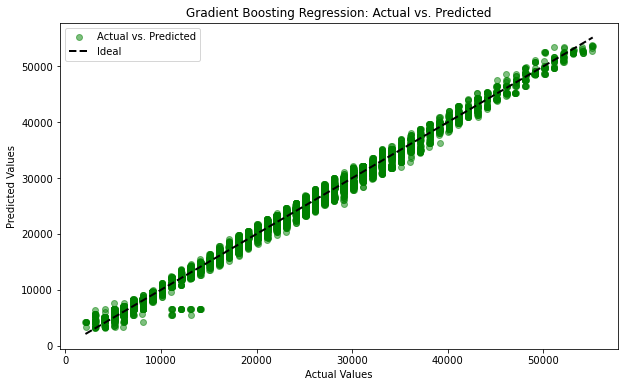

In [49]:
import matplotlib.pyplot as plt

# Plotting the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='green', alpha=0.5, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual vs. Predicted")
plt.legend()
plt.show()

In [50]:
## XGBRegressor

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importances_df.nlargest(3, 'Importance')

# Print the top 3 features
print(top_features)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


                         Feature  Importance
16    storage_issue_reported_l3m    0.977624
18  approved_wh_govt_certificate    0.009696
17                 temp_reg_mach    0.004737
Root Mean Squared Error (RMSE): 950.2086942630905
R-squared: 0.9933000066394967


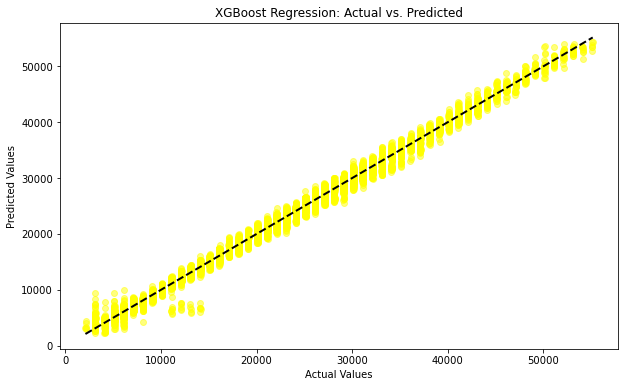

In [52]:
import matplotlib.pyplot as plt

# Plotting the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='yellow', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression: Actual vs. Predicted")
plt.show()


In [53]:
## RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Random Forest regressor
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 965.6981982220196
R-squared: 0.9930797909373427


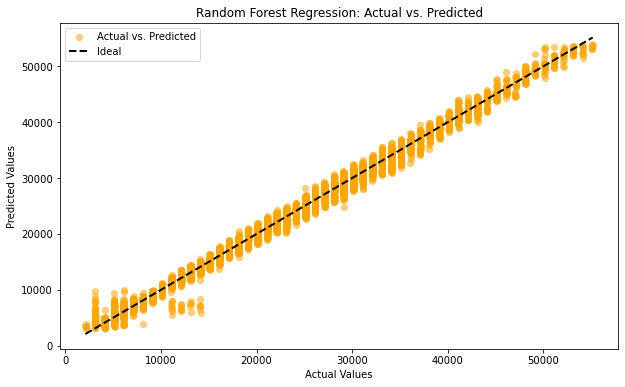

In [55]:
import matplotlib.pyplot as plt

# Plotting the actual values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='orange', alpha=0.5, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.legend()
plt.show()

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Gradient Boosting regressor
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importances_df.nlargest(3, 'Importance')

# Print the top 3 features
print(top_features)


# Print the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

                         Feature  Importance
16    storage_issue_reported_l3m    0.988909
18  approved_wh_govt_certificate    0.008737
17                 temp_reg_mach    0.001038
Root Mean Squared Error (RMSE): 937.6948888766692
R-squared: 0.9934753161915273


In [57]:
df=pd.read_csv("Supply chain test dataset.csv")

In [58]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,...,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,...,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,...,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,...,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,...,0,1,237,NaN,NaN,21,1,B+,2,12


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 2750 non-null   object 
 1   WH_Manager_ID                 2750 non-null   object 
 2   Location_type                 2750 non-null   object 
 3   WH_capacity_size              2750 non-null   object 
 4   zone                          2750 non-null   object 
 5   WH_regional_zone              2750 non-null   object 
 6   num_refill_req_l3m            2750 non-null   int64  
 7   transport_issue_l1y           2750 non-null   int64  
 8   Competitor_in_mkt             2750 non-null   int64  
 9   retail_shop_num               2750 non-null   int64  
 10  wh_owner_type                 2750 non-null   object 
 11  distributor_num               2750 non-null   int64  
 12  flood_impacted                2750 non-null   int64  
 13  flo

In [60]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2640.000000,1462.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,4.030182,0.745818,3.114909,5011.705818,42.655636,0.096000,0.056000,0.662545,163.157818,29.007197,2009.223666,17.217455,0.293818,3.431273,19.106545
std,2.610002,1.183942,1.134737,1066.379543,16.133231,0.294645,0.229964,0.472927,63.162420,8.057788,7.545158,9.050844,0.455593,1.678671,8.547936
min,0.000000,0.000000,1.000000,2018.000000,15.000000,0.000000,0.000000,0.000000,55.000000,11.000000,1996.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,2.000000,4341.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,12.000000
50%,4.000000,0.000000,3.000000,4871.000000,43.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000
75%,6.000000,1.000000,4.000000,5504.000000,57.000000,0.000000,0.000000,1.000000,217.000000,33.000000,2015.000000,24.000000,1.000000,5.000000,26.000000
max,8.000000,5.000000,9.000000,10562.000000,70.000000,1.000000,1.000000,1.000000,271.000000,92.000000,2023.000000,39.000000,1.000000,6.000000,32.000000


In [61]:
df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

In [62]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Mean,Quartile 3,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,num_refill_req_l3m,2750,0.0,2.00,4.0,4.030182,6.0,8.0,7,2.610002,-0.025280,-1.235866,Fairly Negatively Skewed,Platykurtic Curve,No Outliers
1,transport_issue_l1y,2750,0.0,0.00,0.0,0.745818,1.0,5.0,1,1.183942,1.655370,1.977236,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
2,Competitor_in_mkt,2750,1.0,2.00,3.0,3.114909,4.0,9.0,1,1.134737,0.908291,1.619429,Moderately Positively Skewed,Leptokurtic Curve,Have Outliers
3,retail_shop_num,2750,2018.0,4341.25,4871.0,5011.705818,5504.0,10562.0,1137165,1066.379543,0.965034,1.923716,Moderately Positively Skewed,Leptokurtic Curve,Have Outliers
4,distributor_num,2750,15.0,29.00,43.0,42.655636,57.0,70.0,260,16.133231,-0.005531,-1.189208,Fairly Negatively Skewed,Platykurtic Curve,No Outliers
5,flood_impacted,2750,0.0,0.00,0.0,0.096000,0.0,1.0,0,0.294645,2.744281,5.535101,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
6,flood_proof,2750,0.0,0.00,0.0,0.056000,0.0,1.0,0,0.229964,3.864292,12.942165,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
7,electric_supply,2750,0.0,0.00,1.0,0.662545,1.0,1.0,0,0.472927,-0.687902,-1.527903,Moderately Negatively Skewed,Platykurtic Curve,No Outliers
8,dist_from_hub,2750,55.0,109.00,164.0,163.157818,217.0,271.0,3989,63.162420,0.015956,-1.204299,Fairly Positively Skewed,Platykurtic Curve,No Outliers
9,workers_num,2640,11.0,24.00,28.0,29.007197,33.0,92.0,65,8.057788,1.146910,4.044636,Highly Positively Skewed,Leptokurtic Curve,Have Outliers


In [63]:
df.drop(['Ware_house_ID',"WH_Manager_ID"],axis=1,inplace=True)

In [64]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

In [65]:
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].median())

In [66]:
df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate       0
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

In [67]:
correlation=df.corr('pearson')
correlation["wh_est_year"].sort_values(ascending=False)


wh_est_year                   1.000000
num_refill_req_l3m            0.040729
distributor_num               0.011460
dist_from_hub                 0.010353
workers_num                  -0.000774
retail_shop_num              -0.001936
electric_supply              -0.004417
Competitor_in_mkt            -0.005724
transport_issue_l1y          -0.006819
govt_check_l3m               -0.014918
flood_proof                  -0.016274
flood_impacted               -0.021704
temp_reg_mach                -0.065055
wh_breakdown_l3m             -0.402563
storage_issue_reported_l3m   -0.861401
Name: wh_est_year, dtype: float64

In [68]:
col=["storage_issue_reported_l3m","wh_breakdown_l3m","temp_reg_mach","wh_est_year"]


In [69]:
x = df[col]
x["idxs"] = np.where(x["wh_est_year"].isnull(), 1, 0)
x_train = x[x["idxs"]==0]
x_test = x[x["idxs"]==1]

x_test.drop("wh_est_year", axis=1,inplace=True)

In [70]:
mo = LinearRegression()
mo.fit(x_train.drop("wh_est_year", axis=1), x_train["wh_est_year"])
y_pred = mo.predict(x_test)

In [71]:
y_pred

array([2005.135435  , 2011.2202224 , 2008.20610799, ..., 2004.46487977,
       2005.45073171, 2008.47037837])

In [72]:
x_test["wh_est_year"] = np.ceil(y_pred)

In [73]:
x_final = pd.concat([x_train, x_test], axis=0)

In [74]:
df["wh_est_year"] = x_final["wh_est_year"]

In [75]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

In [76]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,Rural,Large,North,Zone 6,7,0,2,5397,Company Owned,26,...,0,1,75,30.0,2019.0,9,1,A,1,29
1,Rural,Large,North,Zone 6,8,2,2,5183,Rented,61,...,0,0,138,20.0,2006.0,25,0,A,4,23
2,Rural,Large,North,Zone 6,3,0,4,4665,Rented,26,...,0,1,188,34.0,2006.0,24,0,B,4,23
3,Rural,Mid,North,Zone 2,2,0,3,5196,Rented,36,...,0,1,156,31.0,2012.0,15,0,A,4,1
4,Rural,Mid,North,Zone 2,5,2,4,8275,Rented,58,...,0,1,237,28.0,2009.0,21,1,B+,2,12


In [77]:
import numpy as np

# Select the continuous variables
continuous_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
                      'retail_shop_num', 'distributor_num', 'flood_impacted',
                      'flood_proof', 'electric_supply', 'dist_from_hub',
                      'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
                      'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m'
                      ]

# Apply IQR method to treat outliers
df_outliers_treated = df.copy()  # Create a copy of the original dataset

for column in continuous_columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df_outliers_treated[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                             df[column].median(), df[column])

# The outliers have been treated in the `data_outliers_treated` DataFrame

# Assuming `data` is your original DataFrame and `data_outliers_treated` is the DataFrame with treated outliers

for column in continuous_columns:
    df[column] = df_outliers_treated[column]

In [78]:
def transform_Variable1(x):
    if x == 'Small':
        return 0
    else:
        return 1

def transform_Variable2(x):
    if x == 'Zone 1':
        return 0
    elif x == 'Zone 2' or x == 'Zone 3':
        return 1
    elif x == 'Zone 4':
        return 2
    elif x == 'Zone 5':
        return 3
    else:
        return 4

def transform_Variable3(x):
    if x == 'A':
        return 0
    elif x == 'A+':
        return 1
    elif x == 'B' or x == 'B+':
        return 2
    else:
        return 3

df.WH_capacity_size = df.WH_capacity_size.apply(transform_Variable1)
df.WH_regional_zone = df.WH_regional_zone.apply(transform_Variable2)
df.approved_wh_govt_certificate = df.approved_wh_govt_certificate.apply(transform_Variable3)

In [79]:
df['WH_capacity_size'].value_counts()

1    2236
0     514
Name: WH_capacity_size, dtype: int64

In [80]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,Rural,1,North,4,7.0,0.0,2.0,5397.0,Company Owned,26.0,...,0.0,1.0,75.0,30.0,2019.0,9.0,1.0,0,1.0,29.0
1,Rural,1,North,4,8.0,2.0,2.0,5183.0,Rented,61.0,...,0.0,0.0,138.0,20.0,2006.0,25.0,0.0,0,4.0,23.0
2,Rural,1,North,4,3.0,0.0,4.0,4665.0,Rented,26.0,...,0.0,1.0,188.0,34.0,2006.0,24.0,0.0,2,4.0,23.0
3,Rural,1,North,1,2.0,0.0,3.0,5196.0,Rented,36.0,...,0.0,1.0,156.0,31.0,2012.0,15.0,0.0,0,4.0,1.0
4,Rural,1,North,1,5.0,2.0,4.0,4871.0,Rented,58.0,...,0.0,1.0,237.0,28.0,2009.0,21.0,1.0,2,2.0,12.0


In [81]:
label_encoder = LabelEncoder()
df["Location_type"] = label_encoder.fit_transform(df["Location_type"])

In [82]:
label_encoder = LabelEncoder()
df["WH_regional_zone"] = label_encoder.fit_transform(df["WH_regional_zone"])

In [83]:
label_encoder = LabelEncoder()
df["zone"] = label_encoder.fit_transform(df["zone"])

In [84]:
label_encoder = LabelEncoder()
df["wh_owner_type"] = label_encoder.fit_transform(df["wh_owner_type"])

In [85]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,1,1,4,7.0,0.0,2.0,5397.0,0,26.0,...,0.0,1.0,75.0,30.0,2019.0,9.0,1.0,0,1.0,29.0
1,0,1,1,4,8.0,2.0,2.0,5183.0,1,61.0,...,0.0,0.0,138.0,20.0,2006.0,25.0,0.0,0,4.0,23.0
2,0,1,1,4,3.0,0.0,4.0,4665.0,1,26.0,...,0.0,1.0,188.0,34.0,2006.0,24.0,0.0,2,4.0,23.0
3,0,1,1,1,2.0,0.0,3.0,5196.0,1,36.0,...,0.0,1.0,156.0,31.0,2012.0,15.0,0.0,0,4.0,1.0
4,0,1,1,1,5.0,2.0,4.0,4871.0,1,58.0,...,0.0,1.0,237.0,28.0,2009.0,21.0,1.0,2,2.0,12.0


In [86]:
df['No_of_year_old_Wh'] = pd.Timestamp.now().year - df['wh_est_year']
df['Issue_Reported'] = (df['transport_issue_l1y'].astype(bool) |
                   df['storage_issue_reported_l3m'].astype(bool) |
                   df['wh_breakdown_l3m'].astype(bool))
df['Infrastructure'] = (df['flood_proof'].astype(bool) |
                   df['electric_supply'].astype(bool) |
                   df['temp_reg_mach'].astype(bool))


In [87]:
from sklearn.preprocessing import LabelEncoder

# Select the variables to be label encoded
variables = ['Issue_Reported', 'Infrastructure']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the variables in the data_encoded DataFrame
for variable in variables:
    df[variable] = label_encoder.fit_transform(df[variable])

In [88]:
import numpy as np

# Specify the columns with the newly created features
columns_with_outliers = ['No_of_year_old_Wh', 'Issue_Reported',
                         'Infrastructure']

# Loop through the columns and perform outlier treatment
for column in columns_with_outliers:
    # Calculate the IQR
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Print the number of outliers
    print(f"Number of outliers in {column}: {outliers.sum()}")

    # Replace outliers with the median value
    df.loc[outliers, column] = df[column].median()


Number of outliers in No_of_year_old_Wh: 0
Number of outliers in Issue_Reported: 86
Number of outliers in Infrastructure: 644


In [89]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,No_of_year_old_Wh,Issue_Reported,Infrastructure
0,0,1,1,4,7.0,0.0,2.0,5397.0,0,26.0,...,30.0,2019.0,9.0,1.0,0,1.0,29.0,4.0,1,1
1,0,1,1,4,8.0,2.0,2.0,5183.0,1,61.0,...,20.0,2006.0,25.0,0.0,0,4.0,23.0,17.0,1,1
2,0,1,1,4,3.0,0.0,4.0,4665.0,1,26.0,...,34.0,2006.0,24.0,0.0,2,4.0,23.0,17.0,1,1
3,0,1,1,1,2.0,0.0,3.0,5196.0,1,36.0,...,31.0,2012.0,15.0,0.0,0,4.0,1.0,11.0,1,1
4,0,1,1,1,5.0,2.0,4.0,4871.0,1,58.0,...,28.0,2009.0,21.0,1.0,2,2.0,12.0,14.0,1,1


In [90]:
predicted_values = model.predict(df)

In [91]:
predicted_values

array([12636.92172409, 31529.24405858, 28347.82846036, ...,
       27578.67556962, 23462.50062606,  4879.53586857])

In [ ]:
import csv

def save_values_to_csv(values, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Predicted Values'])  # Optional: Add a header row
        writer.writerows([[value] for value in values])

# Example usage:
predicted_values = model.predict(df)
save_values_to_csv(predicted_values, 'predicted_values.csv')

### Completed M4